<a href="https://colab.research.google.com/github/arturbernardo/no_estimate/blob/main/analise_noestmate_com_cauda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
%pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.2 MB/s eta 0:00:00


In [22]:
from faker import Faker

fake = Faker()

# Generate a single fake name
print(fake.name())

# Generate a list of fake names
n_names = 10
fake_names = [fake.name() for _ in range(n_names)]
print(fake_names)

# Generate a single fake sentence (task title)
print(fake.sentence(nb_words=3))

# Generate a list of fake sentences (task titles)
n_titles = 10
fake_titles = [fake.sentence(nb_words=3) for _ in range(n_titles)]
print(fake_titles)

Judy Douglas
['Brian Terry', 'Joshua Kelley', 'Michael Santana', 'Christopher Hernandez', 'Cheryl Foley', 'Lisa Nichols', 'Jose Smith', 'Matthew King', 'Theresa Bernard', 'Jon Matthews']
Whom then.
['Movement couple half.', 'Affect prepare.', 'Tough former tax impact.', 'Carry coach serious.', 'Material yourself when.', 'Skin next four.', 'Evening size.', 'Partner special.', 'Sit light.', 'Discover huge interesting source.']


Média original: 2.19
Intervalo 95% via Bootstrap: [2.13, 2.24]


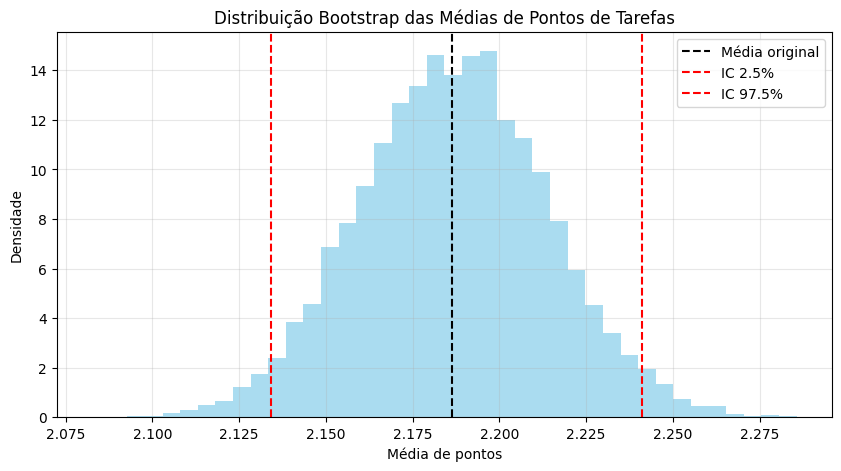

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from faker import Faker # Import Faker

# -----------------------------
# 1. Generate synthetic data and save to CSV
# -----------------------------
np.random.seed(42)
fake = Faker() # Initialize Faker

n_rows = 3000
start_date = datetime(2024, 8, 1)

created_dates = [start_date + timedelta(days=int(d)) for d in np.random.randint(0, 365, n_rows)]
created_dates_str = [d.strftime('%Y-%m-%d') for d in created_dates]

# Generate updated dates based on points
updated_dates = []
points_values = [1, 2, 3, 5, 8]
points_probabilities = [0.4, 0.3, 0.2, 0.07, 0.03]
points = np.random.choice(points_values, size=n_rows, p=points_probabilities)

for i in range(n_rows):
    creation_date = created_dates[i]
    task_points = points[i]

    if task_points in [1, 2]:
        days_to_complete = int(np.random.normal(loc=3, scale=1))
        days_to_complete = max(1, days_to_complete)
    elif task_points == 3:
        days_to_complete = int(np.random.normal(loc=7, scale=2))
        days_to_complete = max(1, days_to_complete)
    elif task_points == 5:
        days_to_complete = int(np.random.normal(loc=10, scale=3))
        days_to_complete = max(1, days_to_complete)
    else: # 8 point tasks
        days_to_complete = int(np.random.normal(loc=15, scale=5))
        days_to_complete = max(1, days_to_complete)

    updated_date = creation_date + timedelta(days=days_to_complete)
    updated_dates.append(updated_date.strftime('%Y-%m-%d'))

# Generate fake task titles using Faker sentence
task_names = [fake.sentence(nb_words=3) for _ in range(n_rows)]

df = pd.DataFrame({
    'created': created_dates_str,
    'updated': updated_dates,
    'name': task_names,
    'points': points
})

df.to_csv('tasks.csv', index=False)

# -----------------------------
# 2. Load data from CSV
# -----------------------------
df = pd.read_csv('tasks.csv')
# display(df.head()) # Uncomment to see head of dataframe

# -----------------------------
# 3. Bootstrap Function
# -----------------------------
def bootstrap_mean(data, n_resamples=10_000):
    """Returns bootstrap samples and confidence intervals of the mean."""
    n = len(data)
    means = np.empty(n_resamples)

    for i in range(n_resamples):
        sample = np.random.choice(data, size=n, replace=True)
        means[i] = np.mean(sample)

    ci_low, ci_high = np.percentile(means, [2.5, 97.5])
    return means, ci_low, ci_high

# -----------------------------
# 4. Perform Bootstrap Analysis
# -----------------------------
task_data_for_bootstrap = df['points']
bootstrap_means, ci_low, ci_high = bootstrap_mean(task_data_for_bootstrap)

print(f"Média original: {np.mean(task_data_for_bootstrap):.2f}")
print(f"Intervalo 95% via Bootstrap: [{ci_low:.2f}, {ci_high:.2f}]")

# -----------------------------
# 5. Visualize Results
# -----------------------------
plt.figure(figsize=(10, 5))
plt.hist(bootstrap_means, bins=40, density=True, alpha=0.7, color="skyblue")
plt.axvline(np.mean(task_data_for_bootstrap), color="black", linestyle="--", label="Média original")
plt.axvline(ci_low, color="red", linestyle="--", label="IC 2.5%")
plt.axvline(ci_high, color="red", linestyle="--", label="IC 97.5%")
plt.title("Distribuição Bootstrap das Médias de Pontos de Tarefas")
plt.xlabel("Média de pontos")
plt.ylabel("Densidade")
plt.legend()
plt.grid(alpha=0.3)
plt.show()